## Распознавание предметов одежды из набора MNIST полносвязной нейросетью

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".


Импортируем необходимые библиотеки

In [92]:
import tensorflow as tf
keras = tf.keras

""" объект последовательной модели нейронной сети """
from keras.models import Sequential
""" полносвязный слой нейронной сети """
from keras.layers import Dense
""" функции для получения обратной связи во время обучения нейронной сети"""
from keras.callbacks import EarlyStopping, ModelCheckpoint
""" вспомогательный модуль Keras для предварительной обработки данных """
from keras import utils
""" библиотекf для работы с матрицами (многомерными тензорами) и линейной алгеброй """
import numpy as np
""" библиотека для считывания и записи файлов в формате ".csv" и других табличных форматах,
    а также для их быстрой и удобной обработки """
import pandas as pd
""" библиотека для работы с операционной системой """
import os 

"""Зафиксируем генератор случайных чисел. Его не менять!!!"""
from numpy.random import seed
seed(2020)
tf.random.set_seed(2020)
""" библиотека для визуализации данных """
import matplotlib.pyplot as plt
%matplotlib inline 
""" посмотрим, какие файлы храняться в директории """
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Загружаем наборы данных для обучения и тестирования

In [93]:
"""функция "read_csv" презназначена для считывания файлов в формате ".csv"
filepath_or_buffer - путь к файлу,
index_col - необязательный параметр, который указывает какую колонку использовать, как индекс.
Если параметр не указан, что pandas создаст столбец с индексами самостоятельно
Подробнее о возможностях функции https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"""
train_df = pd.read_csv(filepath_or_buffer='kaggle1.5/train.csv', index_col='id')
test_df = pd.read_csv(filepath_or_buffer='kaggle1.5/test.csv', index_col='id')
sample_submission = pd.read_csv(filepath_or_buffer='kaggle1.5/sample_submission.csv', index_col='id')

In [94]:
train_df # Каждая строка это чб картинка

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,2,0,0,69,...,49,92,29,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,115,85,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,153,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,127,125,76,0,0,0,4
65796,0,0,0,0,0,0,0,1,0,90,...,0,0,182,197,54,0,0,0,0,2
65797,0,0,0,0,0,0,0,3,1,0,...,0,0,98,134,45,0,0,0,0,6


In [95]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,1,1,0,0,...,16,8,7,0,0,1,2,0,0,0
1,0,0,0,0,0,0,0,0,44,67,...,0,0,0,0,85,41,7,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,120,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,0,5,6,0,0,16,...,0,0,0,0,2,0,0,0,0,0
4197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [96]:
sample_submission

,label
id,
0,5.0
1,NaN
2,5.0
3,5.0
4,5.0
...,...
4195,5.0
4196,5.0
4197,5.0


 Извлекаем данные из таблиц pandas в числовые массивы (векторы и матрицы) numpy, которе можно подать на вход нейронной сети

In [97]:
"""iloc позволяет считать необходимые строки и столбцы, обращаясь к ним не по именам, а по порядковой нумерации
Подробнее про функцию iloc https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
Запись train_df['label'], извлекает из всей таблицы столбец с названием 'label' 
.values - преобразовывает pandas DataFrame (объект таблицы) в numpy массив"""
x_train, y_train = train_df.iloc[:,:-1].values, train_df['label'].values
x_test = test_df.values

In [98]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
y_train

array([3, 9, 2, ..., 6, 1, 3], dtype=int64)

Проверяем совпадает ли количество признаков в тренировочном и тестовом наборах

In [100]:
assert x_train.shape[1] == x_test.shape[1], 'Количество признаков в тренировочном и тестовом наборах должно совпадать'

In [101]:
x_train.shape[1]

784

Создаем соответствие номеров классов с их названиями

In [102]:
classes = {0:'футболка', 1:'брюки', 2:'свитер', 3:'платье', 4:'пальто',
           5:'туфли', 6:'рубашка', 7:'кроссовки', 8:'сумка', 9:'ботинки'}

Смотрим примеры изображений в наборе

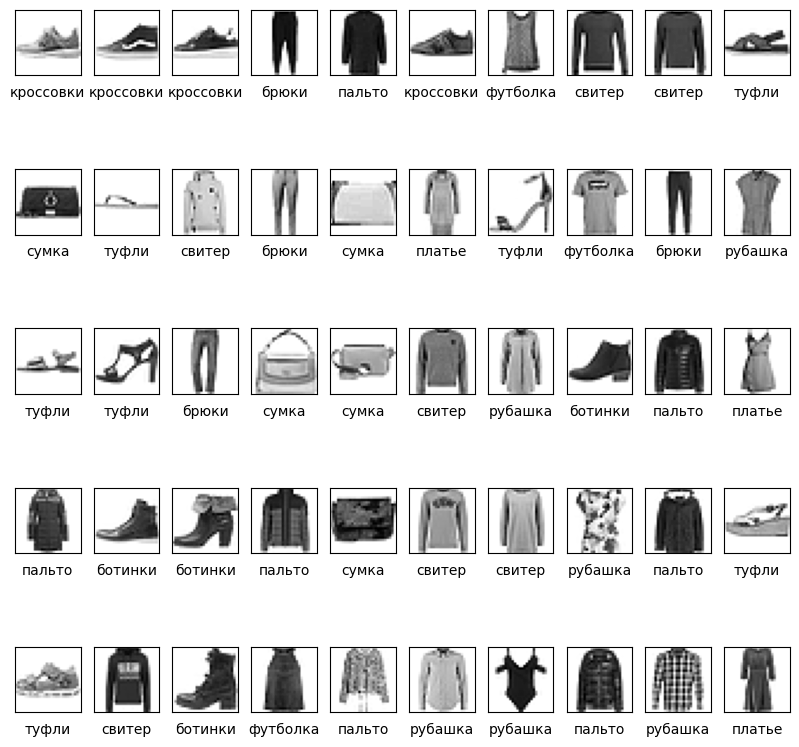

In [103]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

Нормализация данных

In [104]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255.0
# Все преобразования с тренировочным наборам повторяем и для тестового
x_test = x_test / 255.0

Работа с метками правильных ответов

In [105]:
y_train[100]

7

**Преобразуем метки в формат one hot encoding**

In [106]:
y_train = utils.to_categorical(y_train)

Правильный ответ в формате one hot encoding

In [107]:
y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [108]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 2500 нейронов, 784 входа в каждый нейрон
model.add(Dense(units=3000, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(units=10, activation="softmax"))

**Компилируем сеть**

In [109]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3000)              2355000   
                                                                 
 dense_7 (Dense)             (None, 10)                30010     
                                                                 
Total params: 2,385,010
Trainable params: 2,385,010
Non-trainable params: 0
_________________________________________________________________


## Обучаем нейронную сеть[](http://)

Обычный подход

In [110]:
model.fit(x_train, y_train, 
          batch_size=100,
          epochs=20,
          verbose=1)

Epoch 1/20
658/658 [==============================] - 18s 27ms/step - loss: 0.4781 - accuracy: 0.8280
Epoch 2/20
658/658 [==============================] - 18s 27ms/step - loss: 0.3549 - accuracy: 0.8712
Epoch 3/20
658/658 [==============================] - 18s 27ms/step - loss: 0.3223 - accuracy: 0.8816
Epoch 4/20
658/658 [==============================] - 18s 27ms/step - loss: 0.2980 - accuracy: 0.8897
Epoch 5/20
658/658 [==============================] - 18s 27ms/step - loss: 0.2778 - accuracy: 0.8965
Epoch 6/20
658/658 [==============================] - 18s 27ms/step - loss: 0.2664 - accuracy: 0.9010
Epoch 7/20
658/658 [==============================] - 17s 27ms/step - loss: 0.2525 - accuracy: 0.9054
Epoch 8/20
658/658 [==============================] - 17s 26ms/step - loss: 0.2398 - accuracy: 0.9094
Epoch 9/20
658/658 [==============================] - 18s 27ms/step - loss: 0.2304 - accuracy: 0.9131
Epoch 10/20
658/658 [==============================] - 18s 28ms/step - loss: 0.217

## Подход с применением обратной связи

В процессе обучения нейронной сети, мы можем следить за изменением ее показателей и как-то реагировать на эту обратную связь.
Например, если мы видим, что нейронная сеть уже 5 эпох подряд не улучшает свой результат (loss не уменьшается или accuracy не растет), то возможно нет смысла учиться дальше и мы хотели бы остановить процесс обучения. Но нейронная сеть учиться столько эпох, сколько мы указали.
### Чтобы избежать такого лишнего обучения, можно использовать метод **EarlyStopping** (ранний останов).
* С помощью параметра **monitor** она следит за указанной величиной: loss или accuracy.
* С помощью параметра **patience** мы указываем через сколько эпох обучения без улучшения мы хотим прекратить процесс обучения. Таким образом мы можем избежать траты лишних ресурсов и времени
* С помощью параметра **restore_best_weights=True** можно сохранить лучшие веса модели, а не последние.

In [111]:
"""Если вы хотите применить подход с обратной связью,
    то снимите комментарии со следующего кода.
    Попробуйте менять параметры monitor и patience"""
# # Создаем последовательную модель
# model = Sequential()
# # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
# model.add(Dense(units=800, input_dim=784, activation="relu"))
# # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
# model.add(Dense(units=10, activation="softmax"))
# # компилируем модель
# model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
# print(model.summary())
# # создаем лист с обратными связями
# # в случае restore_best_weights=True, применять  ModelCheckpoint не нужно
# callbacks_list = [EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)]
# # добавляем лист с обратными связями в параметр callbacks
# model.fit(x_train, y_train,
#             batch_size=200,
#             epochs=10,
#             callbacks=callbacks_list,
#             verbose=1)

'Если вы хотите применить подход с обратной связью,\n    то снимите комментарии со следующего кода.\n    Попробуйте менять параметры monitor и patience'

## Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [112]:
predictions = model.predict(x_train)

2057/2057 [==============================] - 13s 6ms/step


**Проверяем качество распознавания**

Просматриваем пример изображения

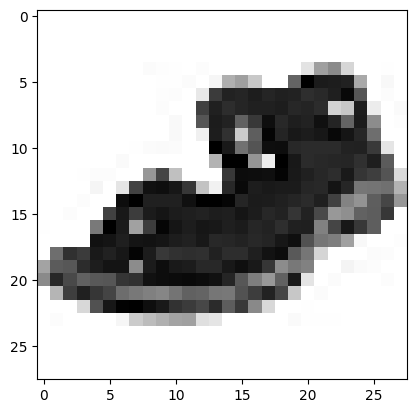

In [113]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 2020
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

In [114]:
predictions[n]

array([4.7320273e-11, 5.1806949e-15, 2.2168296e-14, 6.5962458e-16,
       7.6724342e-11, 9.9906570e-01, 6.4416137e-12, 9.3426753e-04,
       5.7295332e-11, 1.1494409e-09], dtype=float32)

Определяем номер класса изображения, который предлагает сеть

In [115]:
"""argmax - находит максимальный элемент массива и возвращает его номер в массиве"""
np.argmax(predictions[n])

5

Печатаем название класса

In [116]:
"""Передаем в словарь classes номер максимального элемента предсказанного сетью
Словарь возвращает название класса, который скрыт за этим номером"""
classes[np.argmax(predictions[n])]

'туфли'

Печатаем номер класса правильного ответа

In [117]:
np.argmax(y_train[n])

5

Печатаем название класса правильного ответа

In [118]:
classes[np.argmax(y_train[n])]

'туфли'

## Готовим данные для теста на liderboard

Распознаем тестовый набор данных

In [119]:
"""делаем предсказания по всем тестовым данным"""
predictions = model.predict(x_test)
"""извлекаем номера предсказаний с максимальными вероятностями по всем объектам тестового набора"""
predictions = np.argmax(predictions, axis=1)
predictions

132/132 [==============================] - 1s 7ms/step


array([0, 2, 7, ..., 6, 0, 5], dtype=int64)

Пишем результаты предсказаний в шаблон "sample_submission"

In [120]:
"""используем файл с правильным шаблоном формата записи ответов и пишем в него наши предсказания"""
sample_submission['label'] = predictions

Записываем ответы для проверки на liderboard

In [121]:
"""to_csv - пишет табличные данные в файл '.csv' """
sample_submission.to_csv('sample_submission.csv')